<a href="https://colab.research.google.com/github/Aweiss05/Market-Analytics/blob/main/SPY_Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

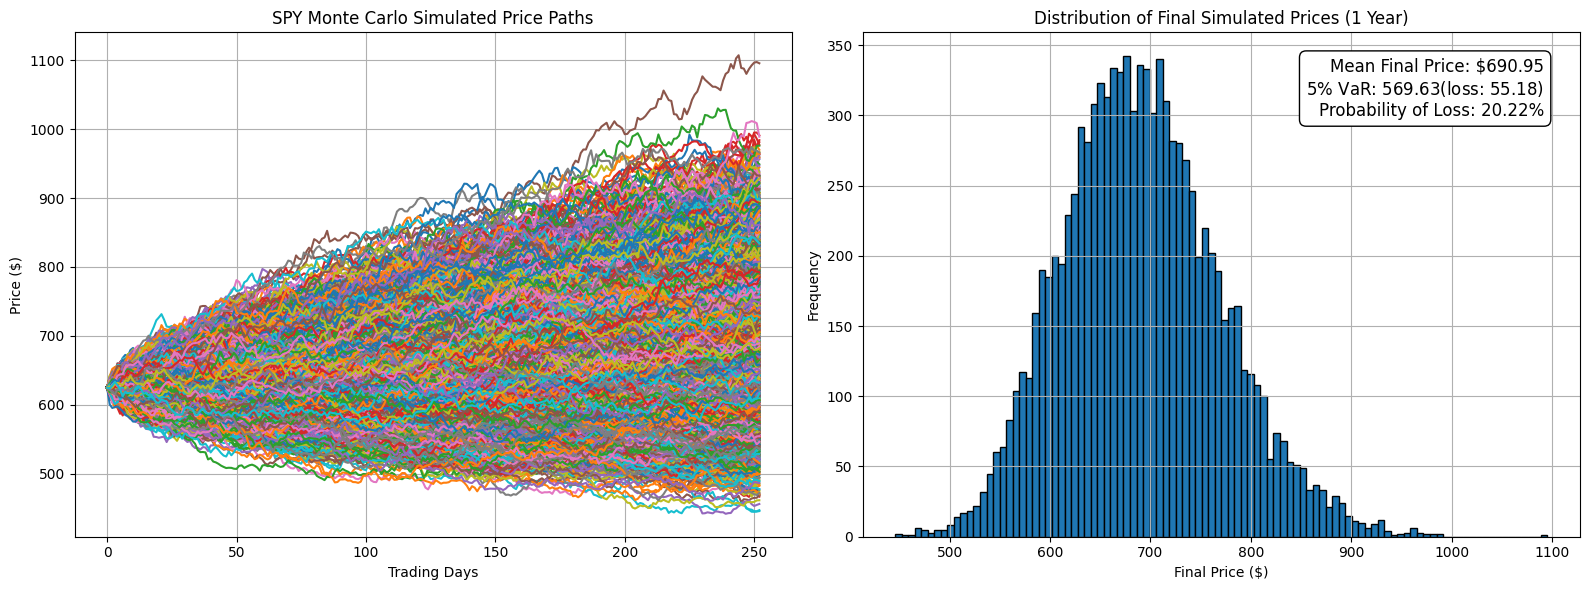

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch latest SPY price
ticker = yf.Ticker("SPY")
latest = ticker.history(period="1d")
latest_close = latest['Close'].iloc[-1]

# Simulation parameters
t0 = latest_close
mu = 0.10
sigma = 0.1123
T = 1
N = 252
dt = T / N
M = 10000

# Initialize price paths
price_paths = np.zeros((M, N+1))
price_paths[:, 0] = t0
Z = np.random.normal(0, 1, size=(M, N))

# Simulate paths
for t in range(1, N+1):
    price_paths[:, t] = price_paths[:, t-1] * np.exp(
        (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[:, t-1]
    )

final_prices = price_paths[:, -1]

# Create a figure
plt.figure(figsize=(16, 6))

# Subplot 1: Simulated price paths
plt.subplot(1, 2, 1)
for i in range(M):
    plt.plot(price_paths[i])
plt.title("SPY Monte Carlo Simulated Price Paths")
plt.xlabel("Trading Days")
plt.ylabel("Price ($)")
plt.grid(True)

# Subplot 2: Histogram of final prices
plt.subplot(1, 2, 2)
plt.hist(final_prices, bins=100, edgecolor='black')
plt.title("Distribution of Final Simulated Prices (1 Year)")
plt.xlabel("Final Price ($)")
plt.ylabel("Frequency")
plt.grid(True)

# Risk metrics
mean_price = np.mean(final_prices)
var_5 = np.percentile(final_prices, 5)
prob_loss = np.mean(final_prices < t0)

# Text box with metrics (on histogram plot)
plt.text(
    0.95, 0.95,
    f"Mean Final Price: ${mean_price:.2f}\n"
    f"5% VaR: ${var_5:.2f} ($loss: {t0 - var_5:.2f})\n"
    f"Probability of Loss: {prob_loss:.2%}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round,pad=0.4", facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()
